# Projet : Deep Learning
*Par Arthur Couturier, Enzo Di Maria, José Colin, Rémi Bonrepaux & Yassir El Bista*

<b> Classification d'images de fruits </b> : *apples, bananas, coconuts, grapes, lemons, limes, mangos, oranges, pineapples, tomatoes*.

In [87]:
import os
import sys
import shutil
import numpy as np
import PIL
from PIL import Image
from scipy.io import loadmat
import matplotlib.pyplot as plt
import time
import progressbar

<b> Accès à la base de données </b>
1. Vous utilisez Google Colab. Dans ce cas vous devrez cloner le dépôt GitHub en exécutant la portion (1) du code ci-dessous.
2. Vous utilisez Visual Studio Code ou Jupyter Notebook. Dès lors, vous devrez simplement exécuter la portion (2) du code.

In [88]:
# Version distante (1)
# !git clone https://github.com/EnzoN7/Image-classification.git
# path = "./Image-classification/images/"

# Version locale (2)
path = "./images/"

<b> Script de chargement des fichiers de la base de données </b>

In [89]:
def load_data(data_path, classes, dataset='train', image_size=64):

    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        num_images += len(dirs)
                                
    x = np.zeros((num_images, image_size, image_size, 3))
    y = np.zeros((num_images, 1))

    print("x_" + dataset + ".shape = " + str(x.shape) + "\ny_" + dataset + ".shape = " + str(y.shape))

    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    with progressbar.ProgressBar(max_value=10) as bar:
        for idx_class in range(len(classes)):
            dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
            num_images += len(dirs)
        
            # Chargement des images
            for idx_img in range(len(dirs)):
                item = dirs[idx_img]
                if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                    # Ouverture de l'image
                    img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                    # Conversion de l'image en RGB
                    img = img.convert('RGB')
                    # Redimensionnement de l'image et écriture dans la variable de retour x 
                    img = img.resize((image_size,image_size))
                    x[current_index] = np.asarray(img)
                    # Écriture du label associé dans la variable de retour y
                    y[current_index] = idx_class
                    current_index += 1

            # Mise à jour de la barre de progression
            time.sleep(0.1)
            bar.update(idx_class)
        
    return x, y

<b> Stockage des fichiers au sein de tenseurs </b>

In [90]:
labels = ['apples', 'bananas', 'coconuts', 'grapes', 'lemons', 'limes', 'mangos', 'oranges', 'pineapples', 'tomatoes']

x_train, y_train = load_data(path, labels, dataset='train', image_size=64)
x_val, y_val = load_data(path, labels, dataset='validation', image_size=64)
x_test, y_test = load_data(path, labels, dataset='test', image_size=64)

x_train.shape = (1875, 64, 64, 3)
y_train.shape = (1875, 1)


100% (10 of 10) |########################| Elapsed Time: 0:00:40 Time:  0:00:40


x_validation.shape = (1130, 64, 64, 3)
y_validation.shape = (1130, 1)


100% (10 of 10) |########################| Elapsed Time: 0:00:23 Time:  0:00:23


x_test.shape = (1141, 64, 64, 3)
y_test.shape = (1141, 1)


100% (10 of 10) |########################| Elapsed Time: 0:00:17 Time:  0:00:17


<b> Affichage d'une sélection d'images aléatoire pour vérifier que l'importation s'est bien déroulée </b>

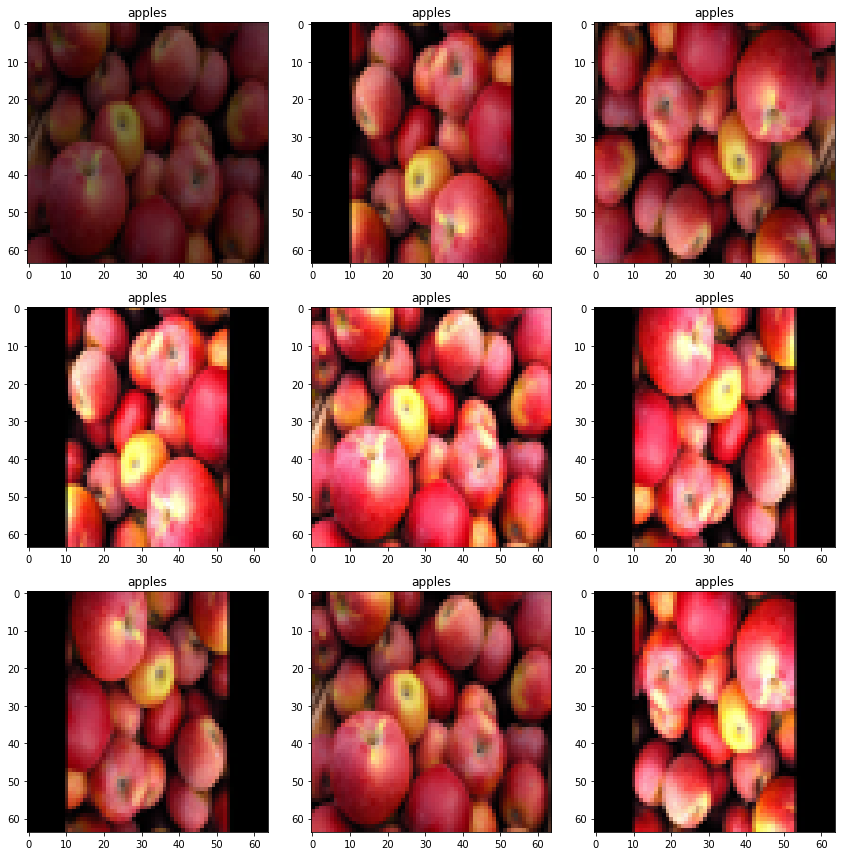

In [91]:
plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()